# Entropy Examples

DS 5001 Text as Data

## Purpose

To demonstrate entropy by way of simple examples, drawn from Manning and Schutz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set()

## Entropy of a Die

<img src="media/ex7.png">

NOTE: In the following code, $i$ does not mean the same thing as in the example above.

In [3]:
def die_entropy(sides=8):
    die = pd.DataFrame([n+1 for n in range(sides)], columns=['face']).set_index('face')
    die['p'] = 1/die.shape[0]   # Probability (equiprobability)
    die['i'] = np.log2(1/die.p) # Information
    die['h'] = die.p * die.i    # Self entropy
    H_die = die.h.sum()         # Etropy
    return die, H_die

In [4]:
die8, H8 = die_entropy()

In [5]:
die8

,p,i,h
face,,,
1,0.125,3.0,0.375
2,0.125,3.0,0.375
3,0.125,3.0,0.375
4,0.125,3.0,0.375
5,0.125,3.0,0.375
6,0.125,3.0,0.375
7,0.125,3.0,0.375
8,0.125,3.0,0.375


In [6]:
H8

3.0

In [7]:
assert H8 == np.log2(len(die8)) # Works with equiprobable distributions

## Insight about $i$

Note that we can just use $i$ to get the encoding scheme, i.e. the number of characters (bits) to use for each event.

## Entropy of a Fair Coin

In [8]:
coin, H_coin = die_entropy(2)

In [9]:
coin

,p,i,h
face,,,
1,0.5,1.0,0.5
2,0.5,1.0,0.5


In [10]:
H_coin

1.0

## Entropies of All Coins

<!--
<img src="media/binary-entropy-curve.png" width=350/>
-->

**Distribution of entropies** for coins with weights ranging from $0$ to $1$ for a given side.

Maximum entropy is reached when both sides are equiprobable ($.5$). 

`DICE` represents the sample spaces for $101$ coins with heads weights ranging from $0$ to $1$ and tail weights $=1 - head$.

In [11]:
n = 100
DICE = pd.DataFrame([(x, n - x) for x in range(n+1)], columns=['heads','tails'])
DICE.index.name = 'die_id'
DICE = DICE / n

In [12]:
DICE

,heads,tails
die_id,,
0,0.00,1.00
1,0.01,0.99
2,0.02,0.98
3,0.03,0.97
4,0.04,0.96
...,...,...
96,0.96,0.04
97,0.97,0.03
98,0.98,0.02


In [13]:
DICE['H(die)'] = DICE.heads * np.log2(1/DICE.heads) + DICE.tails * np.log2(1/DICE.tails)

In [14]:
DICE.fillna(0)

,heads,tails,H(die)
die_id,,,
0,0.00,1.00,0.000000
1,0.01,0.99,0.080793
2,0.02,0.98,0.141441
3,0.03,0.97,0.194392
4,0.04,0.96,0.242292
...,...,...,...
96,0.96,0.04,0.242292
97,0.97,0.03,0.194392
98,0.98,0.02,0.141441


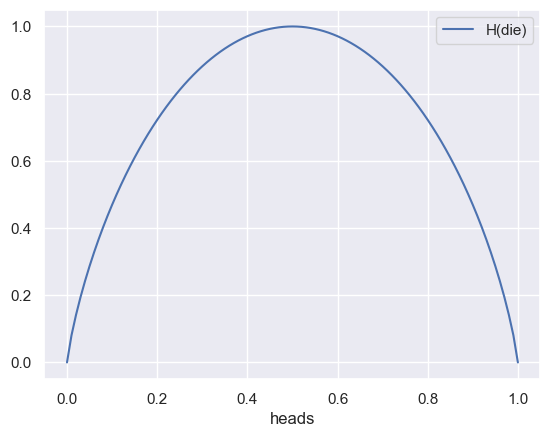

In [15]:
DICE.fillna(0).plot('heads','H(die)');

## Entropy of Simplified Polynesian

<img src="media/ex8.png">

In [16]:
poly = pd.DataFrame([row.split(',') for row in """
p,1/8,100
t,1/4,00
k,1/8,101
a,1/4,01
i,1/8,110
u,1/8,111
""".split("\n")[1:-1]], columns=['char','p', 'enc']).set_index('char')

In [17]:
poly.T

char,p,t,k,a,i,u
p,1/8,1/4,1/8,1/4,1/8,1/8
enc,100,00,101,01,110,111


In [18]:
poly.p = poly.p.apply(eval)
poly['i'] = np.log2(1/poly.p)
poly['h'] = poly.p * np.log2(1/poly.p)

In [19]:
poly['bits'] = poly.enc.str.strip().str.len()
poly['test'] = poly.i == poly.bits

In [20]:
poly

,p,enc,i,h,bits,test
char,,,,,,
p,0.125,100,3.0,0.375,3,True
t,0.250,00,2.0,0.500,2,True
k,0.125,101,3.0,0.375,3,True
a,0.250,01,2.0,0.500,2,True
i,0.125,110,3.0,0.375,3,True
u,0.125,111,3.0,0.375,3,True


In [21]:
H_poly = poly.h.sum()

In [22]:
H_poly

2.5

In [23]:
poly['len'] = poly.enc.str.len()

In [24]:
np.round(poly.len.mean(), 2)

2.67

## Polynesian Syllables

<img src="media/poly2a.png">
<img src="media/poly2b.png">
<img src="media/poly2c.png">

In [40]:
poly2 = pd.DataFrame([row.split(",") for row in """
a,p,1/16
a,t,3/8
a,k,1/16
i,p,1/16
i,t,3/16
i,k,0
u,p,0
u,t,3/16
u,k,1/16
""".split("\n")[1:-1]], columns=['v','c','f']).set_index(['c','v']).f.apply(eval).to_frame('p')

In [41]:
poly2

,,p
c,v,
p,a,0.0625
t,a,0.3750
k,a,0.0625
p,i,0.0625
t,i,0.1875
k,i,0.0000
p,u,0.0000
t,u,0.1875
k,u,0.0625


In [42]:
poly2.sum()

p    1.0
dtype: float64

In [45]:
poly2.unstack().T

c         k       p       t
  v                        
p a  0.0625  0.0625  0.3750
  i  0.0000  0.0625  0.1875
  u  0.0625  0.0000  0.1875

In [48]:
poly2['i'] = np.log2(1/poly2.p)
poly2['h'] = poly2.p * poly2.i

In [49]:
poly2

,,p,i,h
c,v,,,
p,a,0.0625,4.000000,0.250000
t,a,0.3750,1.415037,0.530639
k,a,0.0625,4.000000,0.250000
p,i,0.0625,4.000000,0.250000
t,i,0.1875,2.415037,0.452820
k,i,0.0000,inf,NaN
p,u,0.0000,inf,NaN
t,u,0.1875,2.415037,0.452820
k,u,0.0625,4.000000,0.250000


In [57]:
poly2['bits'] = poly2.i.round(0)

In [58]:
poly2

,,p,i,h,bits
c,v,,,,
p,a,0.0625,4.000000,0.250000,4.0
t,a,0.3750,1.415037,0.530639,1.0
k,a,0.0625,4.000000,0.250000,4.0
p,i,0.0625,4.000000,0.250000,4.0
t,i,0.1875,2.415037,0.452820,2.0
k,i,0.0000,inf,NaN,inf
p,u,0.0000,inf,NaN,inf
t,u,0.1875,2.415037,0.452820,2.0
k,u,0.0625,4.000000,0.250000,4.0


In [59]:
H_poly2 = poly2.h.sum().round(2)

In [60]:
H_poly2

2.44

## Entropy as Tree

Note how the encoding of the repeated rolls of fair die is just the product of ancestor probabilities in a decision tree.

<img src="media/entropy-tree.png">

# Extra

In [61]:
X = {
    'H': .4,
    'T': .6
}

In [62]:
D = []
for f1 in X.keys():
    for f2 in X.keys():
        for f3 in X.keys():
            p = round(X[f1] * X[f2] * X[f3], 3)
            D.append((f1,f2,f3,p))

In [63]:
unfair = pd.DataFrame(D, columns=['f1','f2','f3','p']).set_index(['f1','f2','f3'])

In [64]:
unfair

p
f1 f2 f3       
H  H  H   0.064
      T   0.096
   T  H   0.096
      T   0.144
T  H  H   0.096
      T   0.144
   T  H   0.144
      T   0.216

In [65]:
unfair['i'] = np.log2(1/unfair.p)
unfair['h'] = unfair.p * unfair.i
unfair['bits'] = unfair.i.round(0).astype('int')
H_unfair = unfair.h.sum()
Q_unfair = unfair.i.mean()

In [66]:
unfair

p         i         h  bits
f1 f2 f3                                 
H  H  H   0.064  3.965784  0.253810     4
      T   0.096  3.380822  0.324559     3
   T  H   0.096  3.380822  0.324559     3
      T   0.144  2.795859  0.402604     3
T  H  H   0.096  3.380822  0.324559     3
      T   0.144  2.795859  0.402604     3
   T  H   0.144  2.795859  0.402604     3
      T   0.216  2.210897  0.477554     2

In [67]:
H_unfair, Q_unfair

(2.912851783364006, 3.088340533580353)

<img src="media/entropy-tree-2.png"/>